In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [5]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [6]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [7]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [8]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [10]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [11]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten 

In [ ]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)

In [17]:
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(9, activation='softmax'))

In [18]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,981,961
Trainable params: 267,273
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
vgg16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODEL_PATH+'VGG16_Pretrained.model.best.hdf5', verbose=1 ,save_best_only=True)

In [22]:
history=vgg16_model.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 1.5200 - accuracy: 0.5572 
Epoch 1: val_loss improved from inf to 1.11509, saving model to /content/drive/MyDrive/Thesis/modelVGG16_Pretrained.model.best.hdf5
68/68 [==============================] - 1277s 19s/step - loss: 1.5200 - accuracy: 0.5572 - val_loss: 1.1151 - val_accuracy: 0.6778
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.8065
Epoch 2: val_loss improved from 1.11509 to 0.71693, saving model to /content/drive/MyDrive/Thesis/modelVGG16_Pretrained.model.best.hdf5
68/68 [==============================] - 95s 1s/step - loss: 0.8187 - accuracy: 0.8065 - val_loss: 0.7169 - val_accuracy: 0.8417
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.4901 - accuracy: 0.9132
Epoch 3: val_loss improved from 0.71693 to 0.47248, saving model to /content/drive/MyDrive/Thesis/modelVGG16_Pretrained.model.best.hdf5
68/68 [==============================] - 96s 1s/step

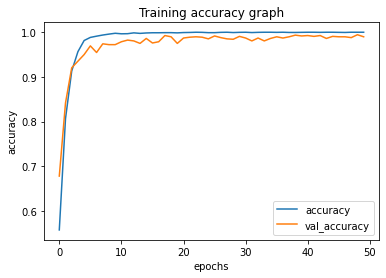

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

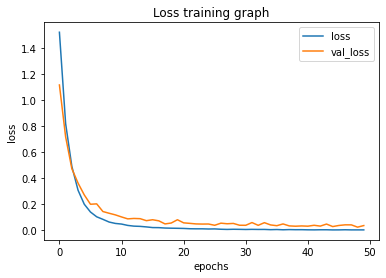

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [25]:
test_loss,test_accuracy=vgg16_model.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

9/9 [==============================] - 124s 15s/step - loss: 0.0314 - accuracy: 0.9896
Test Loss:  0.031404197216033936
Test Accuracy:  0.9895651936531067


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  98.95651936531067


In [28]:
predicted_result=vgg16_model.predict(test_set)
predicted_result[:5]

array([[9.9983716e-01, 3.0196509e-07, 2.1893918e-08, 1.5272849e-04,
        5.2386513e-06, 6.0653032e-12, 1.7326361e-11, 4.3815676e-06,
        1.3402744e-08],
       [9.9937636e-01, 7.8630563e-08, 8.8419362e-08, 6.0692074e-04,
        7.9154142e-06, 1.3025511e-10, 2.2080471e-11, 8.6823866e-06,
        1.0323610e-08],
       [9.9902296e-01, 1.1742555e-07, 1.5648313e-07, 9.4908662e-04,
        1.2496631e-05, 2.7183278e-10, 4.4056862e-11, 1.5124314e-05,
        1.4392184e-08],
       [9.9892515e-01, 1.2935912e-07, 1.9550252e-07, 1.0329591e-03,
        1.6390948e-05, 3.8063724e-10, 6.8244500e-11, 2.5212428e-05,
        1.9665281e-08],
       [9.9950004e-01, 3.0460142e-04, 6.3647026e-06, 7.5161392e-05,
        1.3441669e-05, 1.1085497e-06, 3.0370609e-07, 7.4973541e-05,
        2.4017778e-05]], dtype=float32)

In [29]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0])

In [30]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  3  0  0 57  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  3  0  0 69  0]
 [ 0  0  0  0  0  0  0  0 72]]


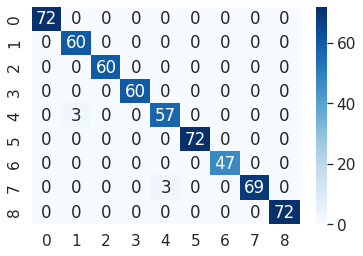

In [32]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9895652173913043


In [34]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.95      1.00      0.98        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       0.95      0.95      0.95        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       1.00      0.96      0.98        72
           8       1.00      1.00      1.00        72

    accuracy                           0.99       575
   macro avg       0.99      0.99      0.99       575
weighted avg       0.99      0.99      0.99       575



In [35]:
import time
t = time.time()

export_path_keras = "Final Thesis/Saved Model/Model_11_vgg16_Pretrained{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
vgg16_model.save(export_path_keras)


Final Thesis/Saved Model/Model_11_vgg16_Pretrained0.9895651936531067_model_1647614762.h5


In [36]:
from tensorflow.keras.models import load_model

In [37]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,981,961
Trainable params: 267,273
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
print(len(reload_model.weights))
print(reload_model.output_shape)

30
(None, 9)


In [39]:
reload_model.layers

In [40]:
t = time.time()

export_path_sm = "Final Thesis/Saved Model/Model_11_vgg16_Pretrained {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(vgg16_model, export_path_sm)

Final Thesis/Saved Model/Model_11_vgg16_Pretrained 0.9895651936531067 Model 1647614786
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_11_vgg16_Pretrained 0.9895651936531067 Model 1647614786/assets


In [41]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [42]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(*, vgg16_input) at 0x7FEC33365250>

In [43]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fec35bc25d0>

In [44]:
model=reload_model